In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA

In [70]:
sns.set(style="darkgrid", font="Arial", font_scale=1.5)

In [27]:
# read in data
raw = pd.read_csv("data\PCA-KC_Data.csv")
raw

NBH_ID                        NBH_NAME  total crime  violent crime  \
0       177  Country Valley-Hawthorn Square          456            848   
1        29       East Community Team North          431            980   
2       221                       The Coves          392             91   
3       119                      Blue Hills          390           1105   
4        50                Vineyard Estates          385            304   
..      ...                             ...          ...            ...   
194     239                      Ridgefield           89             31   
195      39                       Riss Lake           70             65   
196     190                      River View           54             76   
197       8                  Westside North          122            277   
198     209                      Winnetonka          122            277   

     property crime  Median income  Median home value  \
0               358          56044             156425   
1               332          27803              62380   
2               687          71767             266200   
3               262          37498              58311   
4               401          39375              28200   
..              ...            ...                ...   
194              60          82241             183371   
195             240          49849              99100   
196             127          56404             139900   
197              83          50958             210200   
198              83          73875             115100   

     Population with BS or More  White alone  Black or African American alone  \
0                           434         1513                              298   
1                            34          143                              358   
2                           595         1339                              111   
3                            91           90                              717   
4                            86           39                              652   
..                          ...          ...                              ...   
194                         421         1143                               85   
195                         147          582                              525   
196                         209          615                               62   
197                         379          525                              148   
198                         148          929                              133   

     Asian alone  Hispanic or Latino  Total Vacant  Total Renter Occupied  \
0             41                  93            63                    327   
1             10                 301           121                    155   
2             12                 127            47                    276   
3              4                  32           125                    196   
4              0                   0            43                    279   
..           ...                 ...           ...                    ...   
194            2                 118            30                     71   
195            4                  85            79                    287   
196            6                  71           156                    286   
197            9                 278            87                    376   
198           49                 188             0                    187   

     Number of Households  Walk Score  Transit Score  Bike Score  Population  
0                     938          15           15.0          25        1414  
1                     328          47           35.0          33        3352  
2                     701          31           26.0          28        3997  
3                     365          50           43.0          36        5359  
4                     349           6           31.0          30         739  
..                    ...         ...          

In [14]:
raw.columns

Index(['NBH_ID', 'NBH_NAME', 'total crime', 'violent crime', 'property crime',
       'Median income', 'Median home value', 'Population with BS or More',
       'White alone', 'Black or African American alone', 'Asian alone',
       'Hispanic or Latino', 'Total Vacant', 'Total Renter Occupied',
       'Number of Households', 'Walk Score', 'Transit Score', 'Bike Score',
       'Population'],
      dtype='object')

In [59]:
# Select neighborhood attributes, cast as non-null NumPy array
X = raw.loc[:, "total crime":"Population"].dropna().values
# Noramlize the data
normalizer = MinMaxScaler().fit(X)
X_norm = normalizer.transform(X)
X_norm

array([[0.61304837, 0.78403361, 0.57820513, ..., 0.20547945, 0.20634921,
        0.06042885],
       [0.58492688, 0.89495798, 0.54487179, ..., 0.47945205, 0.33333333,
        0.19069705],
       [0.54105737, 0.14789916, 1.        , ..., 0.35616438, 0.25396825,
        0.23405256],
       ...,
       [0.16085489, 0.13529412, 0.28205128, ..., 0.36986301, 0.17460317,
        0.06957048],
       [0.23734533, 0.30420168, 0.22564103, ..., 0.73972603, 0.58730159,
        0.09511326],
       [0.23734533, 0.30420168, 0.22564103, ..., 0.28767123, 0.0952381 ,
        0.0481952 ]])

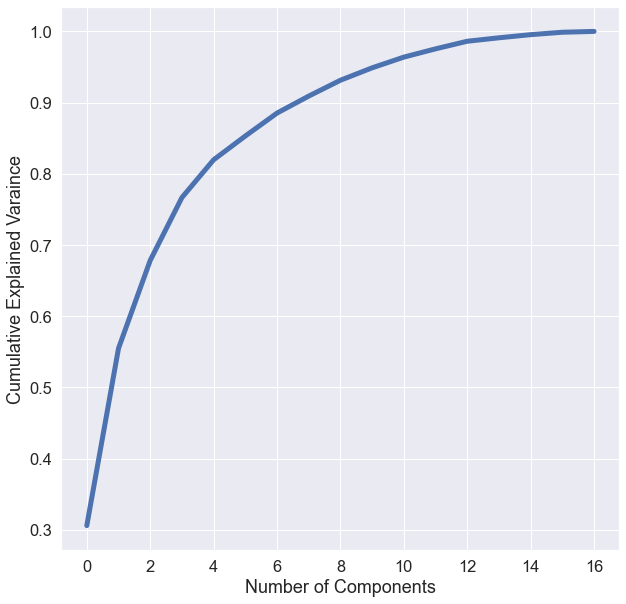

In [71]:
pca = PCA().fit(X_norm)

# Plot number of PCs vs Explained Varaince
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=5.0)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varaince")
plt.savefig("graphics\pcaVar.png")

In [79]:
expVar = np.cumsum(pca.explained_variance_ratio_)
expVar[3]

0.7667148241610557

Given the above graph, as well as the general goal of dimension reduction, it seems ~4 principal components (PCs) would be ideal, since increasing past this point would yeild diminishing results. If ~82% of the varaince can be captured by 4 PCs, that should be sufficient. 